## Match Prediction


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [8]:
matches = pd.read_csv("matches.csv" , index_col = "id")
matches = matches.iloc[:,:-3]
matches.head()

,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue
id,,,,,,,,,,,,,,
1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal"
2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium
3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium
4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium
5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium


In [12]:
matches.describe().iloc[:,2:]

,win_by_runs,win_by_wickets
count,756.000000,756.000000
mean,13.283069,3.350529
std,23.471144,3.387963
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,4.000000
75%,19.000000,6.000000
max,146.000000,10.000000


In [21]:
matches.shape

(756, 14)

In [13]:
matches.winner.unique()

array(['Sunrisers Hyderabad', 'Rising Pune Supergiant',
       'Kolkata Knight Riders', 'Kings XI Punjab',
       'Royal Challengers Bangalore', 'Mumbai Indians',
       'Delhi Daredevils', 'Gujarat Lions', 'Chennai Super Kings',
       'Rajasthan Royals', 'Deccan Chargers', 'Pune Warriors',
       'Kochi Tuskers Kerala', nan, 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

### Taking in Consideration only CSK vs SRH matches

In [15]:
DM=matches[np.logical_or(np.logical_and(matches['team1']=='Chennai Super Kings',matches['team2']=='Sunrisers Hyderabad'),
                            np.logical_and(matches['team2']=='Chennai Super Kings',matches['team1']=='Sunrisers Hyderabad'))]

In [46]:
DM

,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue
id,,,,,,,,,,,,,,
414,2013,Chennai,2013-04-25,Sunrisers Hyderabad,Chennai Super Kings,Sunrisers Hyderabad,bat,normal,0,Chennai Super Kings,0,5,MS Dhoni,"MA Chidambaram Stadium, Chepauk"
435,2013,Hyderabad,2013-05-08,Chennai Super Kings,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Chennai Super Kings,77,0,SK Raina,"Rajiv Gandhi International Stadium, Uppal"
474,2014,Sharjah,2014-04-27,Sunrisers Hyderabad,Chennai Super Kings,Sunrisers Hyderabad,bat,normal,0,Chennai Super Kings,0,5,DR Smith,Sharjah Cricket Stadium
507,2014,Ranchi,2014-05-22,Chennai Super Kings,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,6,DA Warner,JSCA International Stadium Complex
521,2015,Chennai,2015-04-11,Chennai Super Kings,Sunrisers Hyderabad,Chennai Super Kings,bat,normal,0,Chennai Super Kings,45,0,BB McCullum,"MA Chidambaram Stadium, Chepauk"
551,2015,Hyderabad,2015-05-02,Sunrisers Hyderabad,Chennai Super Kings,Chennai Super Kings,field,normal,0,Sunrisers Hyderabad,22,0,DA Warner,"Rajiv Gandhi International Stadium, Uppal"
7913,2018,Hyderabad,22/04/18,Chennai Super Kings,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Chennai Super Kings,4,0,AT Rayudu,"Rajiv Gandhi International Stadium, Uppal"
7939,2018,Pune,13/05/18,Sunrisers Hyderabad,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,8,AT Rayudu,Maharashtra Cricket Association Stadium
7950,2018,Mumbai,22/05/18,Sunrisers Hyderabad,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,2,F du Plessis,Wankhede Stadium


In [25]:
DM.isnull().sum()

season             0
city               0
date               0
team1              0
team2              0
toss_winner        0
toss_decision      0
result             0
dl_applied         0
winner             0
win_by_runs        0
win_by_wickets     0
player_of_match    0
venue              0
dtype: int64

In [28]:
DM.describe().iloc[:,2:].T

,count,mean,std,min,25%,50%,75%,max
win_by_runs,12.0,12.333333,24.548036,0.0,0.0,0.0,8.5,77.0
win_by_wickets,12.0,3.833333,3.214550,0.0,0.0,5.0,6.0,8.0


In [65]:
DM.season.unique()

array([2013, 2014, 2015, 2018, 2019], dtype=int64)

### Head to Head

Text(0.5, 1.0, 'CSK VS SRH - head to head')

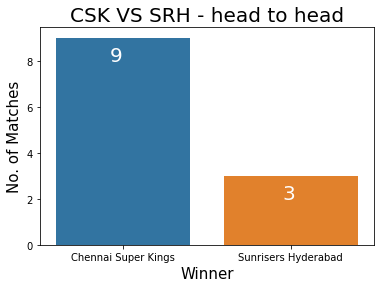

In [47]:
sns.countplot(DM["winner"])
plt.text(-0.08,8,str(DM['winner'].value_counts()['Chennai Super Kings']),size=20,color='white')
plt.text(0.95,2,str(DM['winner'].value_counts()['Sunrisers Hyderabad']),size=20,color='white')
plt.xlabel('Winner',fontsize=15)
plt.ylabel('No. of Matches',fontsize=15)
plt.title('CSK VS SRH - head to head',fontsize = 20)

### Winning Percentage

In [48]:
Winning_Percentage = DM['winner'].value_counts()/len(DM['winner'])

In [55]:
print("CSK winning percentage against SRH(overall) : {}%".format(int(round(Winning_Percentage[0]*100))))
print("SRH winning percentage against CSK(overall) : {}%".format(int(round(Winning_Percentage[1]*100))))

CSK winning percentage against SRH(overall) : 75%
SRH winning percentage against CSK(overall) : 25%


### Match Record Analysis

In [56]:
def performance( team_name , given_df ):
    for value in given_df.groupby('winner'):
        if value[0] == team_name:

            total_win_by_runs = sum(list(value[1]['win_by_runs']))
            total_win_by_wickets = sum(list(value[1]['win_by_wickets']))
            
            if 0 in list(value[1]['win_by_runs'].value_counts().index):
                x = value[1]['win_by_runs'].value_counts()[0]
            else:
                x = 0
                
            if 0 in list(value[1]['win_by_wickets'].value_counts().index):
                y = value[1]['win_by_wickets'].value_counts()[0]
            else:
                y = 0
                
            number_of_times_given_team_win_while_defending = (len(value[1]) - x )
            number_of_times_given_team_win_while_chasing = (len(value[1]) - y )
            
            average_runs_by_which_a_given_team_wins_while_defending = total_win_by_runs / number_of_times_given_team_win_while_defending
            average_wickets_by_which_a_given_team_wins_while_chasing = total_win_by_wickets / number_of_times_given_team_win_while_chasing
            
            print('Number of times given team win while defending :' , number_of_times_given_team_win_while_defending ) 
            print('Number of times given team win while chasing   :' , number_of_times_given_team_win_while_chasing )
            print()
            print('Average runs by which a given team wins while defending  : ' ,round(average_runs_by_which_a_given_team_wins_while_defending))
            print('Average wickets by which a given team wins while chasing : ' ,round(average_wickets_by_which_a_given_team_wins_while_chasing))

In [59]:
performance("Chennai Super Kings",DM)

Number of times given team win while defending : 3
Number of times given team win while chasing   : 6

Average runs by which a given team wins while defending  :  42.0
Average wickets by which a given team wins while chasing :  6.0


In [60]:
performance("Sunrisers Hyderabad",DM)

Number of times given team win while defending : 1
Number of times given team win while chasing   : 2

Average runs by which a given team wins while defending  :  22.0
Average wickets by which a given team wins while chasing :  6.0


### Toss Based Analysis

In [61]:
DM.groupby(['toss_winner',"toss_decision"]).count().iloc[:,1]

toss_winner          toss_decision
Chennai Super Kings  bat              2
                     field            5
Sunrisers Hyderabad  bat              2
                     field            3
Name: city, dtype: int64

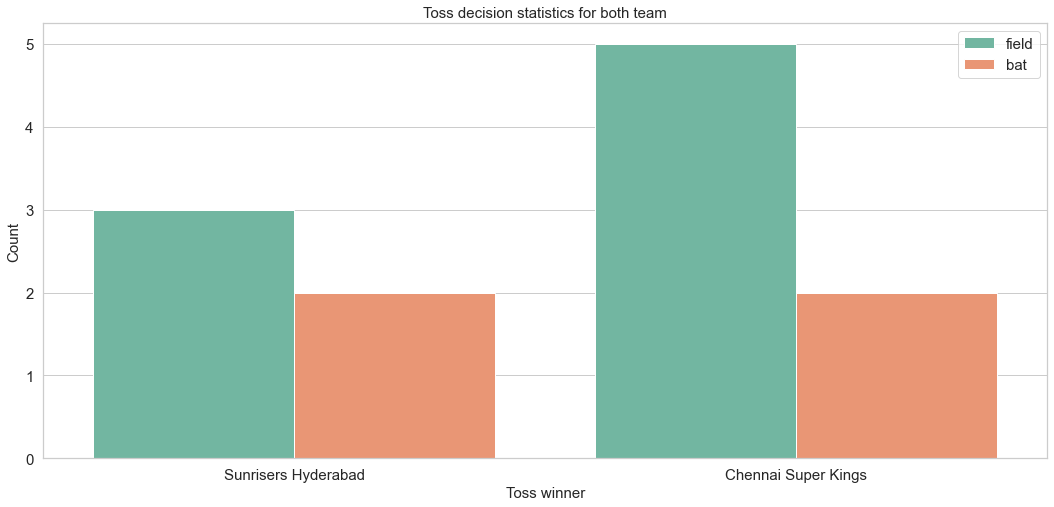

In [62]:
sns.set(style='whitegrid')
plt.figure(figsize = (18,8))
sns.countplot(DM['toss_winner'],palette='Set2',hue=matches['toss_decision'])
plt.title('Toss decision statistics for both team',fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.xlabel('Toss winner',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.legend(loc='best',fontsize=15)
plt.show()

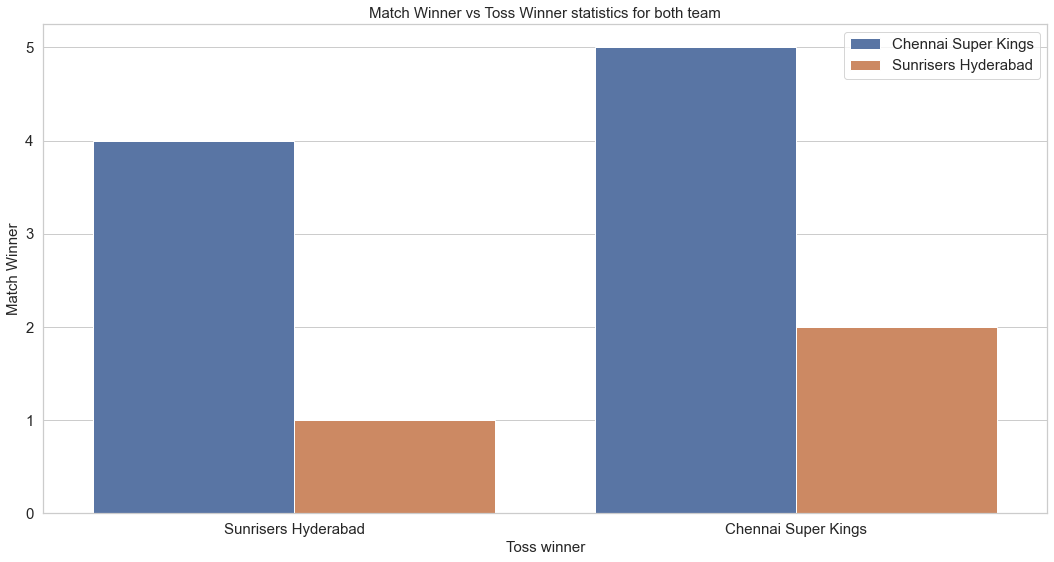

In [64]:
sns.set(style='whitegrid')
plt.figure(figsize = (18,9))
sns.countplot(DM['toss_winner'],hue=DM['winner'])
plt.title('Match Winner vs Toss Winner statistics for both team',fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.xlabel('Toss winner',fontsize=15)
plt.ylabel('Match Winner',fontsize=15)
plt.legend(loc=1,fontsize=15)

In [71]:
player = pd.DataFrame(DM.player_of_match.value_counts())
player

,player_of_match
DA Warner,3
SR Watson,2
AT Rayudu,2
SK Raina,1
F du Plessis,1
BB McCullum,1
MS Dhoni,1
DR Smith,1


### Recent Year Performance Analysis

In [67]:
cond2 = DM["season"] == 2018
cond3 = DM["season"] == 2019
final = DM[cond2 | cond3]
final

,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue
id,,,,,,,,,,,,,,
7913,2018,Hyderabad,22/04/18,Chennai Super Kings,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Chennai Super Kings,4,0,AT Rayudu,"Rajiv Gandhi International Stadium, Uppal"
7939,2018,Pune,13/05/18,Sunrisers Hyderabad,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,8,AT Rayudu,Maharashtra Cricket Association Stadium
7950,2018,Mumbai,22/05/18,Sunrisers Hyderabad,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,2,F du Plessis,Wankhede Stadium
7953,2018,Mumbai,27/05/18,Sunrisers Hyderabad,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,8,SR Watson,Wankhede Stadium
11324,2019,Hyderabad,17/04/19,Chennai Super Kings,Sunrisers Hyderabad,Chennai Super Kings,bat,normal,0,Sunrisers Hyderabad,0,6,DA Warner,Rajiv Gandhi Intl. Cricket Stadium
11332,2019,Chennai,23/04/19,Sunrisers Hyderabad,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,SR Watson,M. A. Chidambaram Stadium


In [68]:
player = pd.DataFrame(final.player_of_match.value_counts())
player

,player_of_match
AT Rayudu,2
SR Watson,2
DA Warner,1
F du Plessis,1


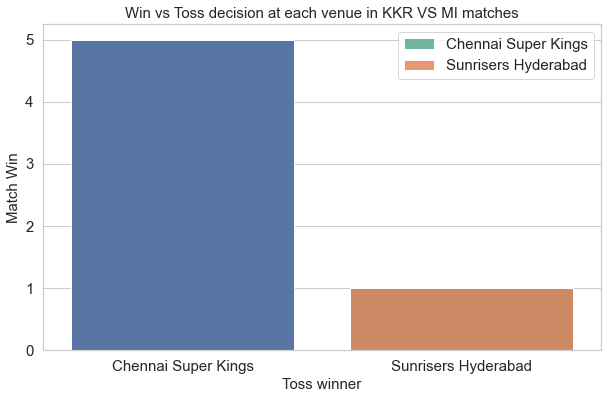

In [69]:
plt.figure(figsize = (10,6))
sns.countplot(final['toss_decision'],palette='Set2',hue=final['winner'])
sns.countplot(final['winner'])
plt.title('Win vs Toss decision at each venue in KKR VS MI matches',fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.xlabel('Toss winner',fontsize=15)
plt.ylabel('Match Win',fontsize=15)
plt.legend(loc=1,fontsize=15)

plt.show()

Based on above analysis of past records we can predict that CSK will be favorite for today's clash . But SRH 's performance has also shown subsequent increase. So they also have good chance of winning.

But taking in consideration the analysis we performed over both the teams, we predict CSK to be the favorite for today's match.